In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('lottery.csv')
# display the first 5 rows
data.head()

,Unnamed: 0,population,GDP,perincome,sales
0,1,4203,5458,6524.5,12083.65
1,2,4210,6003,7240.6,13276.28
2,3,4217,6672,8007.6,15236.58
3,4,4221,8047,9107.6,17432.11
4,5,4271,9305,10369.6,19515.86


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 

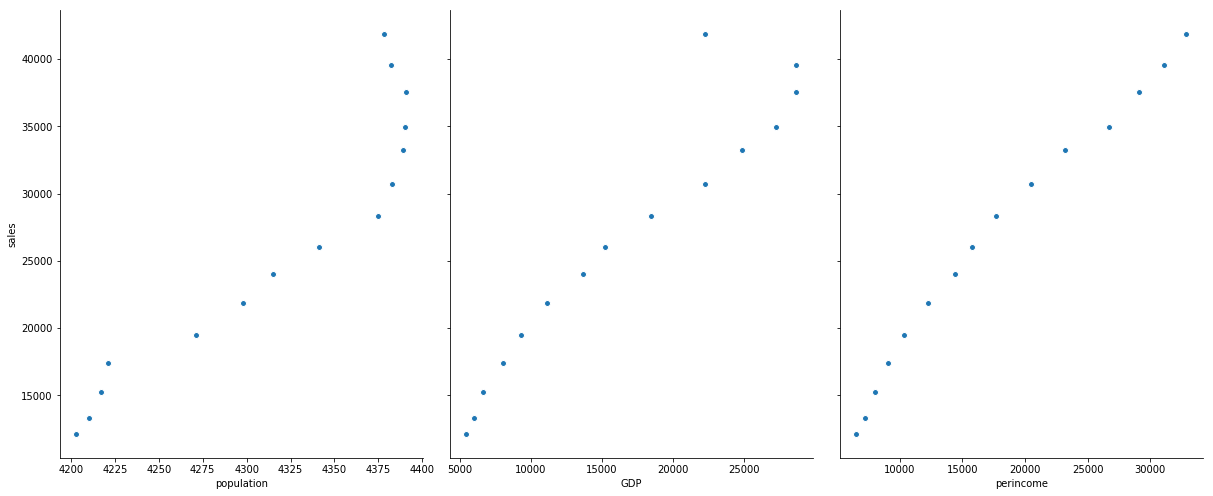

In [4]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['population','GDP','perincome'], y_vars='sales', size=7, aspect=0.8)
plt.show()#注意必须加上这一句，否则无法显示。

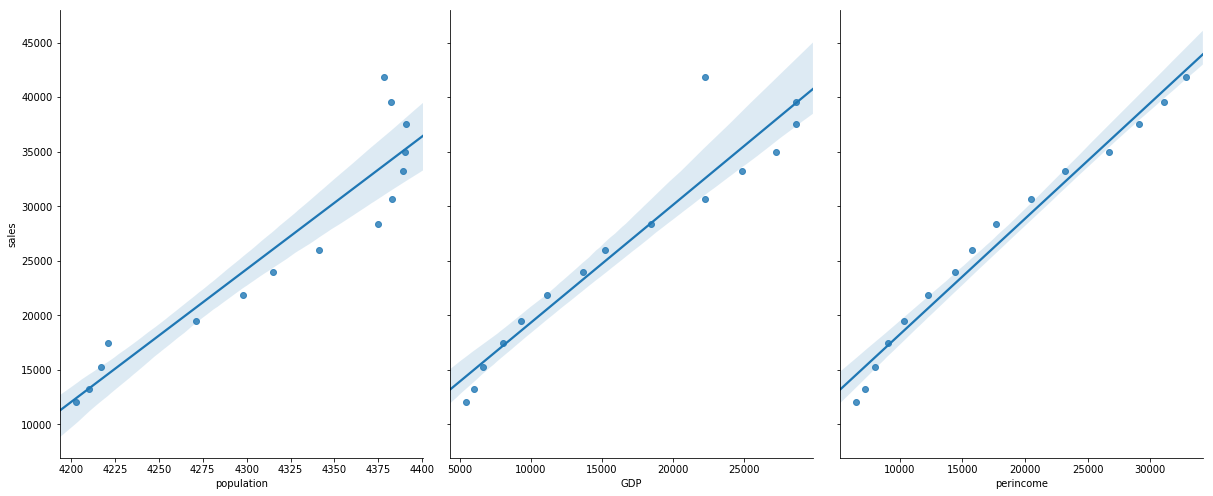

In [5]:
sns.pairplot(data, x_vars=['population','GDP','perincome'], y_vars='sales', size=7, aspect=0.8, kind='reg')

In [6]:
#create a python list of feature names
feature_cols = ['population','GDP','perincome']

In [7]:
# use the list to select a subset of the original DataFrame
X = data[feature_cols]
# equivalent command to do this in one line
X = data[['population','GDP','perincome']]

In [8]:
print(X.head())

   population   GDP  perincome
0        4203  5458     6524.5
1        4210  6003     7240.6
2        4217  6672     8007.6
3        4221  8047     9107.6
4        4271  9305    10369.6


In [9]:
print (type(X))

<class 'pandas.core.frame.DataFrame'>


In [10]:
# select a Series from the DataFrame
y = data['sales']
# equivalent command that works if there are no spaces in the column name
y = data.sales
# print the first 5 values
print(y.head())

0    12083.65
1    13276.28
2    15236.58
3    17432.11
4    19515.86
Name: sales, dtype: float64


In [11]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(11, 3)
(11,)
(4, 3)
(4,)


In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print (model)
print (linreg.intercept_)
print (linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
-219430.92823484863
[54.09381621 -0.27357366  0.93693112]


In [15]:
zip(feature_cols, linreg.coef_)

In [16]:
# pair the feature names with the coefficients
print (feature_cols, linreg.coef_)

['population', 'GDP', 'perincome'] [54.09381621 -0.27357366  0.93693112]


In [17]:
y_pred = linreg.predict(X_test)
print (y_pred)

[15230.81666977 25996.07166427 23729.37896841 14359.98094872]


In [18]:
print (type(y_pred),type(y_test))
print (len(y_pred),len(y_test))
print (y_pred.shape,y_test.shape)
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
4 4
(4,) (4,)
RMSE by hand: 337.5683078174137


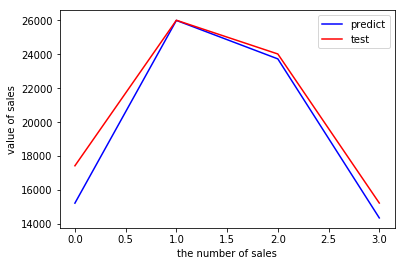

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()